In [1]:
import networkx as nx
import numpy as np
import pandas as pd  
import os
import glob
from utils import *
from plot import *
from renormalizer import *
from kuramoto_plot import *
from simplicial_complexes import *
from matplotlib.colors import LogNorm

First we will read the C.elegans data provided by https://www.wormatlas.org/neuronalwiring.html#Connectivitydata, but binary with undirected links.

In [2]:
path = os.getcwd()
file_list = sorted(glob.glob('*.xls' ))
pd.Series(file_list)

0    NeuronConnect.xls
dtype: object

In [3]:
file = file_list[0]
print(file)
df = pd.read_excel(file) 
df.columns=['Neuron 1','Neuron 2','type','value']
df.head()

NeuronConnect.xls


,Neuron 1,Neuron 2,type,value
0,ADAR,ADAL,EJ,1
1,ADFL,ADAL,EJ,1
2,ASHL,ADAL,EJ,1
3,AVDR,ADAL,EJ,2
4,PVQL,ADAL,EJ,1


In [4]:
#Removing the neural muscular junctions NMJ.
#df=df.loc[df['type']!='EJ']
#df=df.loc[df['type']!='Sp']
#df=df.loc[df['type']!='R']
#df=df.loc[df['type']!='Rp']
df=df.loc[df['type']!='NMJ']
#df=df.loc[df['type']!='S']

         value                                               ...            \
Neuron 2  ADAL ADAR ADEL ADER ADFL ADFR ADLL ADLR AFDL AFDR  ... VD04 VD05   
Neuron 1                                                     ...             
ADAL       NaN  1.0  1.0  NaN  2.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
ADAR       1.0  NaN  NaN  1.0  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
ADEL       1.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
ADER       NaN  1.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
ADFL       2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
VD09       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
VD10       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
VD11       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
VD12       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...

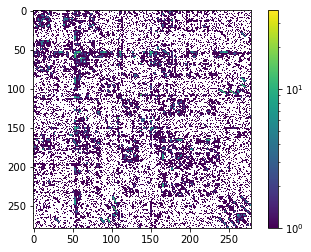

In [5]:
#Creating the weighted adjacency matrix from the data frame
df = df.groupby(['Neuron 1', 'Neuron 2'], as_index=False)['value'].sum()
data_ind = df.set_index(['Neuron 1','Neuron 2']).unstack('Neuron 2')
print(data_ind)
A=np.array(data_ind.value,dtype=float)
A[np.isnan(A)] = 0
A_weight=A
plt.imshow(A,norm=LogNorm())
plt.colorbar()
plt.show()        

In [6]:
#Creating the networkx graph
G=nx.from_numpy_matrix(A)
Gcc=sorted(nx.connected_components(G))
G0=G.subgraph(Gcc[0])


In [7]:
print(G0.number_of_nodes())
print(G0.number_of_edges())


279
2290


Now we make the laplacian renormalization , the second entry represents the number of steps.

In [8]:
G1=laplacian_renorm(G0,1)
G2=laplacian_renorm(G0,2)
G3=laplacian_renorm(G0,3)



[[221, 148], [159, 47], [220, 147], [136, 38], [214, 133], [257, 106], [275, 274], [260, 107], [140, 139], [265, 264], [226, 121], [160, 48], [227, 122], [272, 244], [276, 259], [143, 94], [255, 105], [278, 135], [273, 245], [228, 125], [252, 103], [72, 8], [81, 24], [229, 126], [215, 134], [219, 25], [213, 183], [271, 33], [16, 9], [277, 248], [269, 31], [254, 104], [164, 163], [109, 36], [268, 30], [41, 10], [62, 61], [80, 23], [212, 184], [42, 11], [50, 15], [233, 231], [267, 29], [154, 137], [145, 127], [46, 45], [180, 116], [74, 4], [77, 76], [249, 101], [179, 119], [258, 246], [218, 26], [217, 132], [216, 131], [266, 95], [211, 82], [270, 32], [49, 14], [40, 19], [39, 18], [96, 88], [262, 261], [251, 102], [186, 120], [234, 189], [232, 230], [250, 201], [194, 191], [253, 243], [138, 68], [192, 124], [142, 141], [235, 190], [195, 69], [75, 5], [117, 115], [199, 83], [168, 52], [98, 90], [73, 21], [79, 17], [130, 85], [207, 86], [193, 123], [97, 89], [167, 51], [196, 162], [22, 6

In [9]:
print(Average_degree(G0))
print('\n')
print(Average_degree(G1))
print(Average_degree(G2))
print(Average_degree(G3))

16.415770609318997


23.985714285714284
27.885714285714286
23.82857142857143


In [10]:
print(nx.average_clustering(G0))
print('\n')
print(nx.average_clustering(G1))
print(nx.average_clustering(G2))
print(nx.average_clustering(G3))


0.3371339990890197


0.4396804493028668
0.6215200795481098
0.7870831173175686


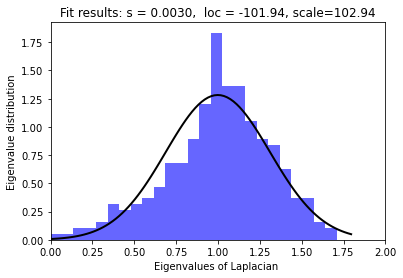

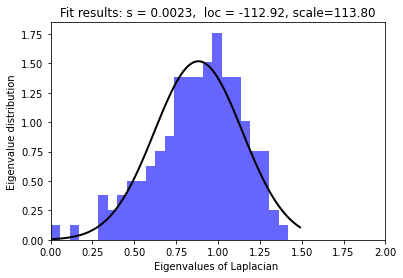

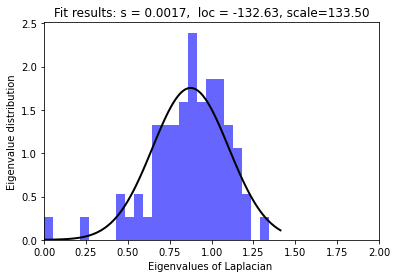

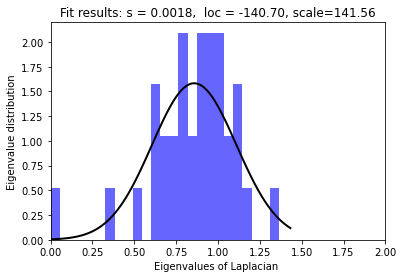

In [11]:
laplacian_distrubution_lognorm(G0)
laplacian_distrubution_lognorm(G1)
laplacian_distrubution_lognorm(G2)
laplacian_distrubution_lognorm(G3)

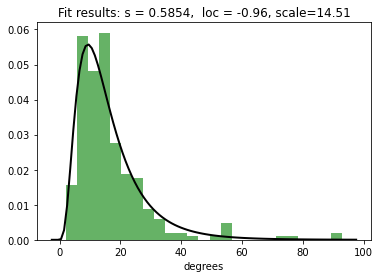

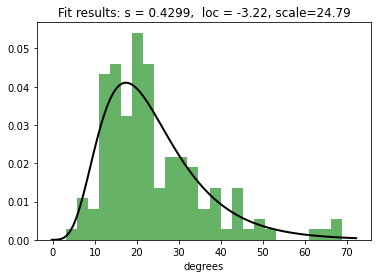

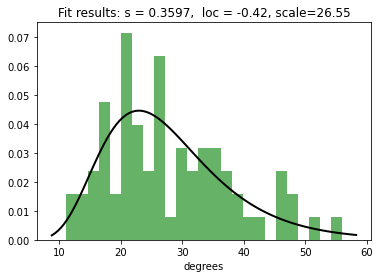

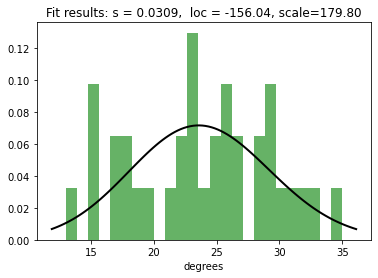

In [12]:
plot_degree_dist_lognorm(G0)
plot_degree_dist_lognorm(G1)
plot_degree_dist_lognorm(G2)
plot_degree_dist_lognorm(G3)

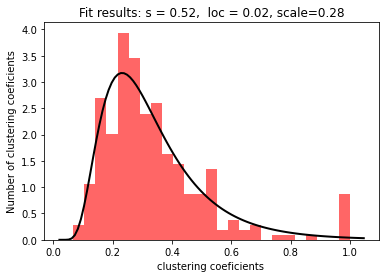

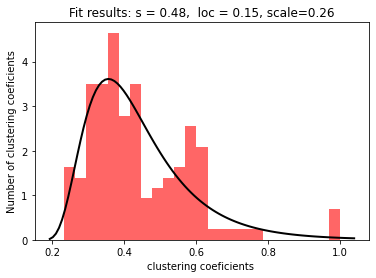

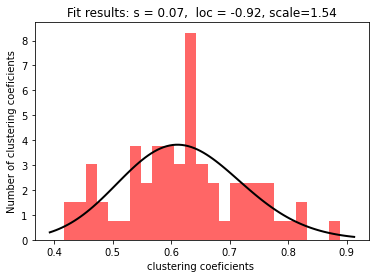

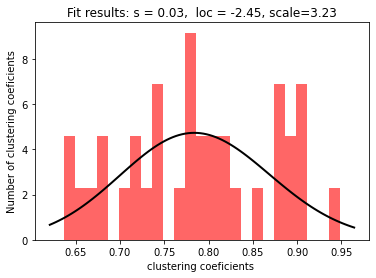

In [13]:
clustering_distribution_lognorm(G0)
clustering_distribution_lognorm(G1)
clustering_distribution_lognorm(G2)
clustering_distribution_lognorm(G3)

In [14]:
simpl_comp=CliqueComplex(G0)
simpl_comp1=CliqueComplex(G1)
simpl_comp2=CliqueComplex(G2)
simpl_comp3=CliqueComplex(G3)

In [15]:
print(simpl_comp.betti_number(1,0))
print(simpl_comp.betti_number(2,0))
print(simpl_comp.betti_number(3,0))

KeyboardInterrupt: 

In [ ]:
print(simpl_comp1.betti_number(1,0))
print(simpl_comp1.betti_number(2,0))
print(simpl_comp1.betti_number(3,0))
print(simpl_comp1.betti_number(4,0))
print(simpl_comp1.betti_number(5,0))
print(simpl_comp1.betti_number(6,0))

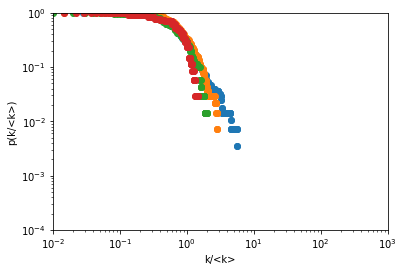

In [16]:
plot_ccdf(G0)
plot_ccdf(G1)
plot_ccdf(G2)
plot_ccdf(G3)

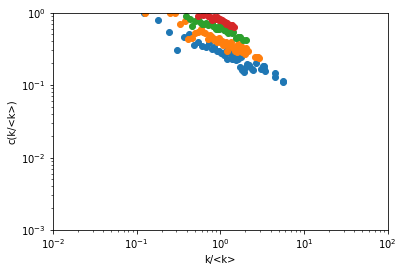

In [17]:
clustering_per_kl(G0)
clustering_per_kl(G1)
clustering_per_kl(G2)
clustering_per_kl(G3)